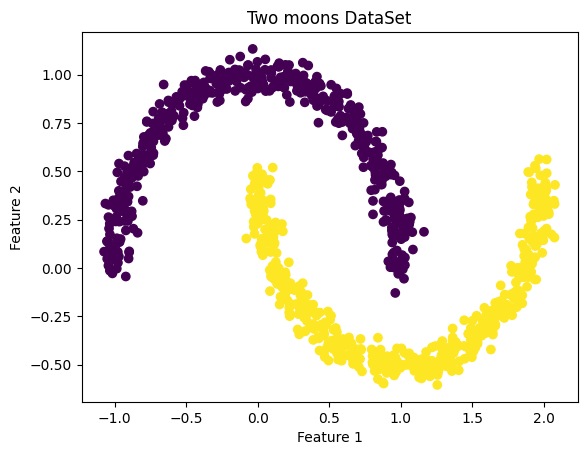

In [25]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler

# Generate the data
dataset1_X, dataset1_y = make_moons(n_samples=1000, noise=0.05, random_state=0)


# Plot the data
plt.scatter(dataset1_X[:, 0], dataset1_X[:, 1], c=dataset1_y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Two moons DataSet')
plt.show()


In [3]:
def data_generator():
  n = 2000
  t = np.linspace(0, 2*np.pi, n)
  r = np.linspace(0.5, 1, n)
  x1 = r * np.cos(t) + np.random.randn(n) * 0.033
  y1 = r * np.sin(t) + np.random.randn(n) * 0.033
  x2 = -r * np.cos(t) + np.random.randn(n) * 0.033
  y2 = -r * np.sin(t) + np.random.randn(n) * 0.033
  X = np.vstack((np.hstack((x1, x2)), np.hstack((y1, y2)))).T
  y = np.hstack((np.zeros(n), np.ones(n)))

  return X,y


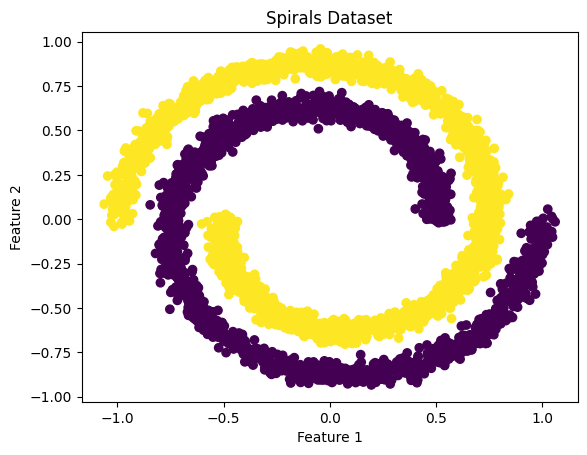

In [4]:
import numpy as np
import matplotlib.pyplot as plt


Dataset2_X, Dataset2_y = data_generator()


plt.scatter(Dataset2_X[:, 0], Dataset2_X[:, 1], c=Dataset2_y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Spirals Dataset')
plt.show()


# Import libraries

In [5]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import random
from sklearn.metrics.pairwise import euclidean_distances


# Step 1: 

In [6]:
# Step 1: Randomly select num_points data points
def random_select_data(data, num_points):
    num_samples = data.shape[0]
    random_indices = np.random.choice(num_samples, size=num_points, replace=False)
    selected_data = data[random_indices]
    return selected_data

# Step 2: Perform hierarchical clustering
def hierarchical_clustering(data, num_clusters , t):
    clustering = AgglomerativeClustering(n_clusters=num_clusters, linkage= t)
    labels = clustering.fit_predict(data)
    return labels

# Step 3: Select representation points
def select_representation_points(data, labels, num_rep_points):
    representation_points = []
    representation_labels = []
    unique_labels = np.unique(labels)

    for label in unique_labels:
        cluster_data = data[labels == label]
        num_cluster_data = len(cluster_data)

        # Randomly select the first point
        random_index = np.random.choice(range(num_cluster_data))
        current_point = cluster_data[random_index]
        selected_points = [random_index]

        # Find the next points based on maximum Euclidean distance
        while len(selected_points) < num_rep_points:
            max_distance = -1
            max_distance_idx = -1

            for i in range(num_cluster_data):
                if i not in selected_points:
                    distance = np.linalg.norm(cluster_data[i] - current_point)
                    if distance > max_distance:
                        max_distance = distance
                        max_distance_idx = i

            selected_points.append(max_distance_idx)
            current_point = cluster_data[max_distance_idx]

        # Shift the representation points towards the centroid
        centroid = np.mean(cluster_data, axis=0)
        shifted_points = cluster_data[selected_points] + 0.2 * (centroid - cluster_data[selected_points])
        representation_points.extend(shifted_points)
        representation_labels.extend([label] * num_rep_points)

    return np.array(representation_points), np.array(representation_labels)


### step 1: dataset1_X

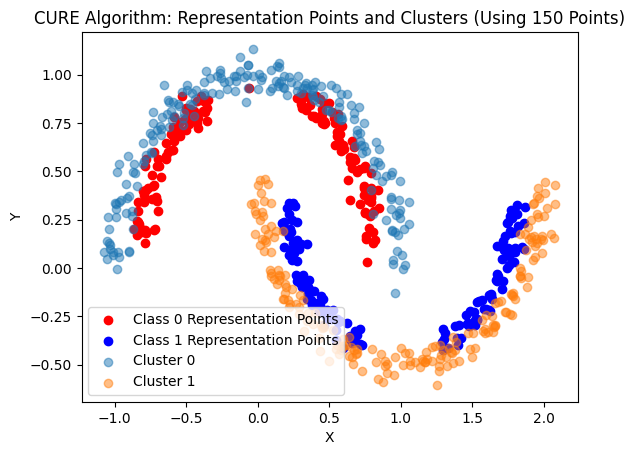

In [29]:
data = dataset1_X

num_data_points = 400
num_clusters = 2
num_rep_points = 150

# Step 1: Randomly select data points
selected_data = random_select_data(data, num_data_points)

# Step 2: Perform hierarchical clustering
labels = hierarchical_clustering(selected_data, num_clusters, 'single')

# Step 3: Select representation points with labels
representation_points_1, representation_labels_1 = select_representation_points(selected_data, labels, num_rep_points)

# Plotting the representation points and clusters
unique_labels = np.unique(labels)
colors = ['red', 'blue', 'green', 'orange', 'purple']  # Add more colors if needed
for i, label in enumerate(unique_labels):
    class_rep_points = representation_points_1[representation_labels_1 == label]
    if len(class_rep_points) > 0:
        plt.scatter(class_rep_points[:, 0], class_rep_points[:, 1], c=colors[i], label=f'Class {label} Representation Points')

for label in unique_labels:
    cluster_data = selected_data[labels == label]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], alpha=0.5, label=f'Cluster {label}')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'CURE Algorithm: Representation Points and Clusters (Using {num_rep_points} Points)')
plt.show()


### Step 1: Dataset2_X

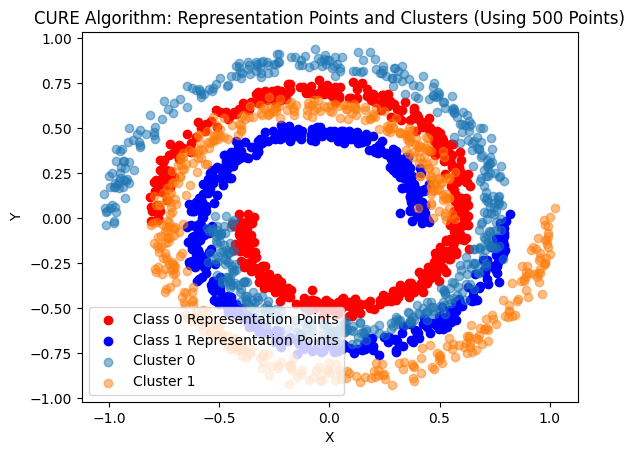

In [34]:
data = Dataset2_X

num_data_points = 1000
num_clusters = 2
num_rep_points = 500

# Step 1: Randomly select data points
selected_data = random_select_data(data, num_data_points)

# Step 2: Perform hierarchical clustering
labels = hierarchical_clustering(selected_data, num_clusters, 'single')

# Step 3: Select representation points with labels
representation_points_2, representation_labels_2 = select_representation_points(selected_data, labels, num_rep_points)

# Plotting the representation points and clusters
unique_labels = np.unique(labels)
colors = ['red', 'blue', 'green', 'orange', 'purple']  # Add more colors if needed
for i, label in enumerate(unique_labels):
    class_rep_points = representation_points_2[representation_labels_2 == label]
    if len(class_rep_points) > 0:
        plt.scatter(class_rep_points[:, 0], class_rep_points[:, 1], c=colors[i], label=f'Class {label} Representation Points')

for label in unique_labels:
    cluster_data = selected_data[labels == label]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], alpha=0.5, label=f'Cluster {label}')
plt.legend(loc = 'lower left')
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'CURE Algorithm: Representation Points and Clusters (Using {num_rep_points} Points)')
plt.show()


Step2

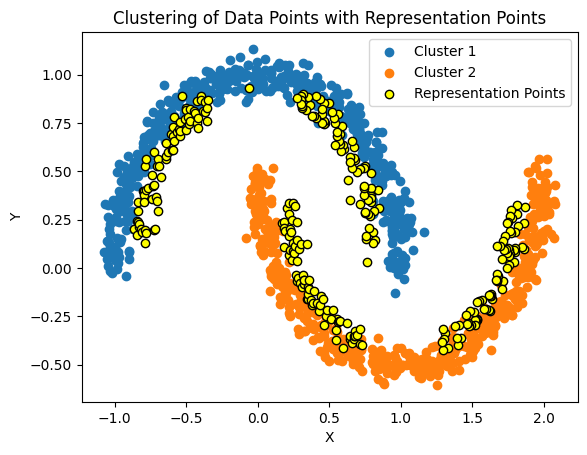

In [30]:
# Step 1: Read the dataset
data = dataset1_X

# Step 2: Compute Euclidean distances between each data point and the representation points
distances = euclidean_distances(data, representation_points_1)

# Step 3: Assign the label of the closest representation point to each data point
data_labels = [representation_labels_1[np.argmin(distances[i])] for i in range(len(data))]

# Step 4: Plot the data points with their assigned labels
for label in np.unique(data_labels):
    cluster_data = data[data_labels == label]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {label+1}')

plt.scatter(representation_points_1[:, 0], representation_points_1[:, 1], c='yellow', edgecolors='black', linewidths=1, label='Representation Points')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Clustering of Data Points with Representation Points')
plt.show()


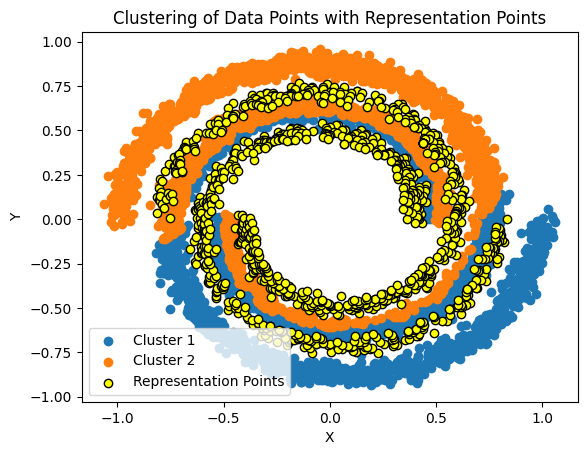

In [15]:
# Step 1: Read the dataset
data = Dataset2_X

# Step 2: Compute Euclidean distances between each data point and the representation points
distances = euclidean_distances(data, representation_points_2)

# Step 3: Assign the label of the closest representation point to each data point
data_labels = [representation_labels_1[np.argmin(distances[i])] for i in range(len(data))]

# Step 4: Plot the data points with their assigned labels
for label in np.unique(data_labels):
    cluster_data = data[data_labels == label]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {label+1}')

plt.scatter(representation_points_2[:, 0], representation_points_2[:, 1], c='yellow', edgecolors='black', linewidths=1, label='Representation Points')
plt.legend(loc='lower left')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Clustering of Data Points with Representation Points')
plt.show()
